#**Maestría en Inteligencia Artificial Aplicada**
##**Advanced Machine Learning Methods (Gpo 10)**
###Tecnológico de Monterrey
###Profesor Ph.D. José Antonio Cantoral Ceballos

## **Activity 3a**

###Exploring Word Embeddings with GloVe and Numpy 

##**Team 33**:

### Humberto Lozano Cedillo A01363184
### Julio Cesar Lynn Jimenez A01793660
### Sarah Mendoza Medina A01215352
### David Mireles Samaniego A01302935

## TC 5033
### Word Embeddings

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [2]:
# Import libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

#### Load file

In [2]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'glove.6B.50d.txt'
emb_dim = 50

In [6]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}
    f = open(path, encoding='utf-8')
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_dict[word] = vector
    f.close()
    return embeddings_dict

In [ ]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [8]:
# Serialize
with open('embeddings_dict_50D_JL.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)



In [4]:
# Deserialize
# with open('embeddings_dict_50D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

In [3]:
with open('embeddings_dict_50D_JL.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

In [4]:
word = embeddings_dict["the"]

isinstance(word, list)

False

In [6]:
word = embeddings_dict["the"]

isinstance(word, np.ndarray)

True

#### See some embeddings

In [9]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [10]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [5]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    vectors = np.asarray([embeddings_dict[word] for word in words2show])

    # PCA is the default function to be used but as long as func is a class that implements fit_transform method we will be able to plot the results
    dim_reduction = func(n_components=2)
    dim_space = dim_reduction.fit_transform(vectors)
    x = dim_space[:,0]
    y = dim_space[:,1]

    plt.scatter(x, y)
    
    for i, word in enumerate(words2show):
        plt.text(x[i], y[i], word)

    plt.show()

In [6]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


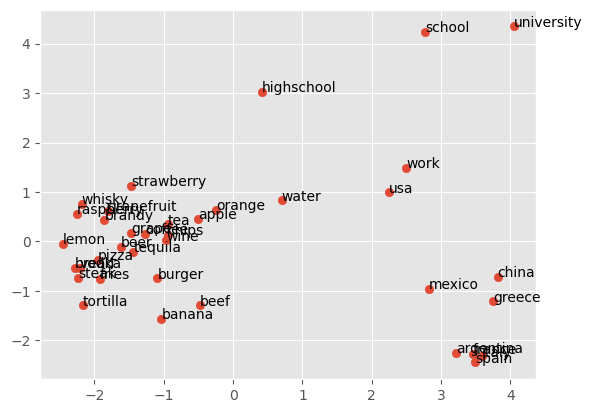

In [7]:
# 
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

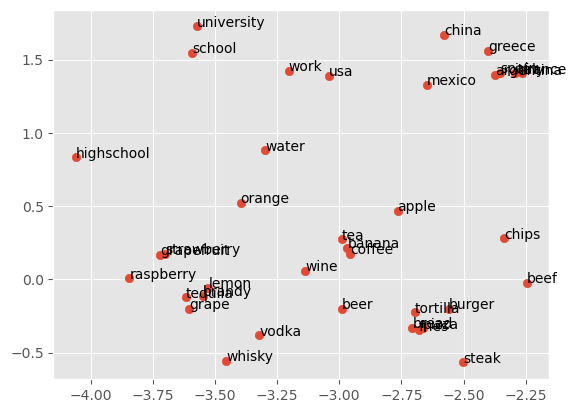

In [8]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [37]:
def cosine_similarity(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))

In [59]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    vector1 = embeddings_dict[word1]
    vector2 = embeddings_dict[word2]
    vector3 = embeddings_dict[word3]

    # Do the vector operations of substraction and addition to get the resulting vector to be used to compare against the corpus
    analogy_vector = vector2 - vector1 + vector3 

    similarity_dict = {}
    for i, i_word in enumerate(embeddings_dict):
        if i_word == word1 or i_word == word2 or i_word == word3:
            continue # skip the words involved on the operation
        sim_factor = cosine_similarity(analogy_vector, embeddings_dict[i_word])
        similarity_dict[i_word] = sim_factor
    
    sorted_list = sorted(similarity_dict.items(), key=lambda x:x[1], reverse=True)
    (analogy_word, sim_factor) = sorted_list[0] 
    return analogy_word

In [60]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

In [61]:
analogy('mexico', 'mexican', 'spain', embeddings_dict)

'spanish'

In [62]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    similarity_dict = {}
    vector = embeddings_dict[word]

    for i, i_word in enumerate(embeddings_dict):
        if i_word == word:
            continue # skip the word used as argument
        sim_factor = cosine_similarity(vector, embeddings_dict[i_word])
        similarity_dict[i_word] = sim_factor
    
    sorted_list = sorted(similarity_dict.items(), key=lambda x:x[1], reverse=True)
    return dict(sorted_list[:top_n]).keys()


In [63]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [64]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
